<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/examples_bank/5_sklearn/muestreo_estratificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Muestreo estratificado

Hasta ahora hemos considerado métodos de muestreo puramente aleatorios.

Esto generalmente está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), pero si no lo es, corre el riesgo de introducir un sesgo de muestreo significativo.

Cuando una empresa de encuestas decide llamar a 1000 personas para hacerles algunas preguntas, no elige a 1000 personas al azar en una guía telefónica.

Intentan asegurarse de que estas 1.000 personas sean representativas de toda la población.

Por ejemplo, la población de EE.UU. es 51,3 % de mujeres y 48,7 % de hombres, por lo que una encuesta bien realizada en EE. UU. intentaría mantener esta proporción en la muestra: 513 mujeres y 487 hombres.

Esto se denomina muestreo estratificado: la población se divide en subgrupos homogéneos llamados estratos, y se muestrea el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general.

Si las personas que realizan la encuesta usaran un muestreo puramente aleatorio, habría alrededor de un 12 % de posibilidades de muestrear un conjunto de prueba sesgado que tuviera menos del 49 % de mujeres o más del 54 % de mujeres.

De cualquier manera, los resultados de la encuesta estarían significativamente sesgados.

Suponga que conversó con expertos que le dijeron que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda.

Es posible que desee asegurarse de que el conjunto de prueba sea representativo de las diversas categorías de ingresos en todo el conjunto de datos.

Dado que el ingreso medio es un atributo numérico continuo, primero debe crear un atributo categórico de ingresos.

Miremos más de cerca el histograma de ingreso medio

In [4]:
import pandas as pd
v = pd.read_csv('vivienda.csv') 
v.describe().ingresos

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: ingresos, dtype: float64

<AxesSubplot:>

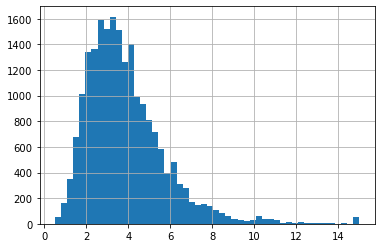

In [6]:
v.ingresos.hist(bins = 50) 

La mayoría de los valores de ingreso medio están agrupados alrededor de 1.5 a 6 (es decir, $15,000–$60,000), pero algunos los ingresos van mucho más allá de 6.

Es importante tener una cantidad suficiente de instancias en su conjunto de datos para cada estrato, de lo contrario, la estimación de la importancia de un estrato puede estar sesgada.

Esto significa que no debe tener demasiados estratos, y cada estrato debe ser lo suficientemente grande.

* El siguiente código usa la función `pd.cut()` para crear un atributo categórico de ingresos  
  con cinco categorías (etiquetadas del 1 al 5): 
* la categoría 1 va de 0 a 1,5 (es decir, menos de $15 000), 
* la categoría 2 de 1,5 a 3, y así:

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
v = pd.read_csv('vivienda.csv') 

In [ ]:
v.head(3)

In [ ]:
v.describe() 

# Crear un nuevo atributo(la categorización del atributo ingresos)

In [ ]:
v['ingresos_cat'] = pd.cut(v.ingresos, bins = [0, 1.5, 3,4.5,6,np.inf],\
                          labels = [1,2,3,4,5])  

In [ ]:
v.ingresos_cat.hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
dividir = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42) 

In [ ]:
for train_index, test_index in dividir.split(v, v.ingresos_cat):
    strat_train_set = v.loc[train_index]
    strat_test_set = v.loc[test_index]

In [ ]:
strat_test_set.ingresos_cat.value_counts()/len(strat_test_set) 

In [ ]:
strat_train_set.ingresos_cat.hist() 

In [ ]:
fig,ax = plt.subplots(1,3, figsize = (12,6)) 

ax[0].hist(strat_train_set.ingresos_cat) 
ax[1].hist(strat_test_set.ingresos_cat)
ax[2].hist(v.ingresos_cat) 

plt.show() 
